Meeting notes
Elements to include
1. Number of building (res vs. non-res))
2. Archetypes
3. Appraisal value
4. Race ethnicity data - (check for age)
5. Building year built/age group/retrofit
6. Population by building (Numprec in HUA) - layered map ( example: https://github.com/npr99/IN-CORE_notebooks/blob/main/IN_CORE_Seaside_CommunityDescription.ipynb) 


Visualizations needed
1. Pivot Table - include blocks, parcels, other relevant info
2. Histogram + geopandas layered map + pivot table   -- Yunjie
3. Histogram + geopandas layered map + pivot table   -- Yunjie
4. Pie Chart + Pivot table
5. Histogram + Pivot table
6. geopandas map


? - include/not include missing data?
pivot table - statistical summary (min, max, median, total count)


Tasks
Rafia - pdf
Tarun - create shared folder and send link
Tarun, Rafia - All geopandas maps
Yunjie - pivot tables for 2 & 3
Himadri - pivot table 1, 4 & 5

In [2]:
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt
 
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [5]:
#Input data
bInv = pd.read_csv("../resilience_NC/Shelby/Incore_Optimization_Data/Shelby/incore_data/MMSA Building Inventory/all_bldgs_ver5_Project.csv") #Building Inventory Data
hua = pd.read_csv("../resilience_NC/Shelby/Incore_Optimization_Data/Shelby/derived_data/IN-CORE_1bv6_population_dislocation.csv") #Housing Unit Allocation Data

/home/rafia37/anaconda3/envs/pyincoreEnv9/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (49,53,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
bInv.columns
#important ones are appr_bldg, struct_typ, year_built
#should have unique guid 

Index(['parid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_type', 'occ_detail', 'major_occ',
       'broad_occ', 'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst',
       'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility', 'dwell_unit',
       'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'IMPUTED', 'strctid'],
      dtype='object')

In [7]:
hua.columns
#important ones are race, hispan, gqtype

Index(['guid', 'DS_0', 'DS_1', 'DS_2', 'DS_3', 'Unnamed: 0', 'parid_card',
       'bldg_id', 'struct_typ', 'str_prob', 'year_built', 'no_stories',
       'a_stories', 'b_stories', 'bsmt_type', 'sq_foot', 'gsq_foot',
       'occ_detail', 'major_occ', 'broad_occ', 'appr_bldg', 'repl_cst',
       'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility',
       'dwell_unit', 'str_typ2', 'occ_typ2', 'tract_id', 'IMPUTED', 'strctid',
       'addrptid', 'blockid', 'blockidstr', 'PLCNAME10', 'PLCGEOID10',
       'COUNTYFP10', 'geometry', 'huestimate', 'residential', 'bldgobs',
       'flag_ap', 'parid', 'occ_type', 'randomap', 'randommergeorder', 'huid',
       'FIPScounty', 'bgid', 'serialno', 'livetype', 'numprec', 'gqpop',
       'ownershp', 'race', 'hispan', 'hispan_flag', 'vacancy', 'gqtype',
       'randomhu', 'aphumerge', 'bgidstr', 'bgyear', 'pblackbg', 'phispbg',
       'd_sf', 'rploss_0', 'rploss_1', 'rploss_2', 'rploss_3', 'prdis',
       'dislocated'],
      dtype='o

### Archtype

In [8]:
#present this table nicely - pivot table - Nathanael's notebook
bInv.struct_typ.value_counts()

W1     271853
W2      12097
URM     11141
S1       3608
S3       3522
RM       1600
PC1      1110
C1        913
C2         81
MH         43
PC2        35
Name: struct_typ, dtype: int64

Text(0, 0.5, 'Building Count')

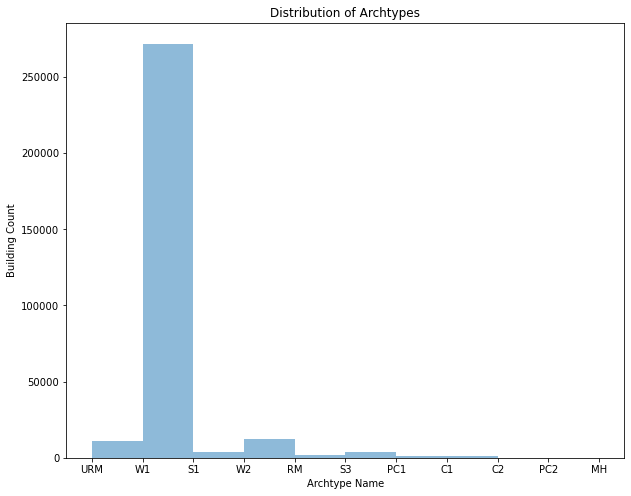

In [9]:
bInv.struct_typ.hist(alpha = 0.5, grid=False)
plt.title("Distribution of Archtypes")
plt.xlabel("Archtype Name")
plt.ylabel("Building Count")

### Appraisal Value

<AxesSubplot:>

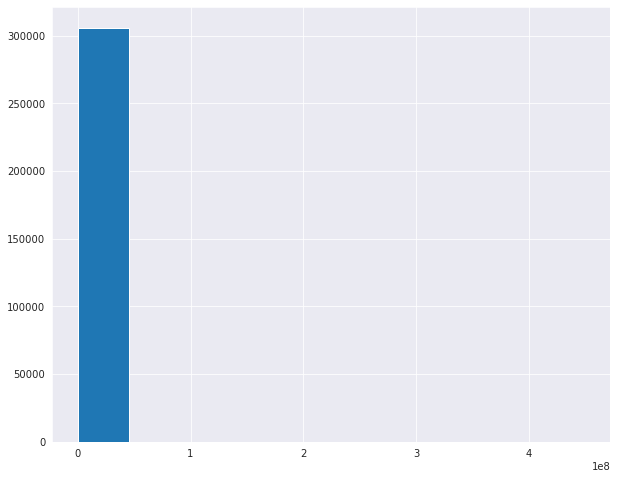

In [84]:
bInv.appr_bldg.hist()

In [16]:
bInv["apr_mil"] = bInv.appr_bldg/10**6

<AxesSubplot:>

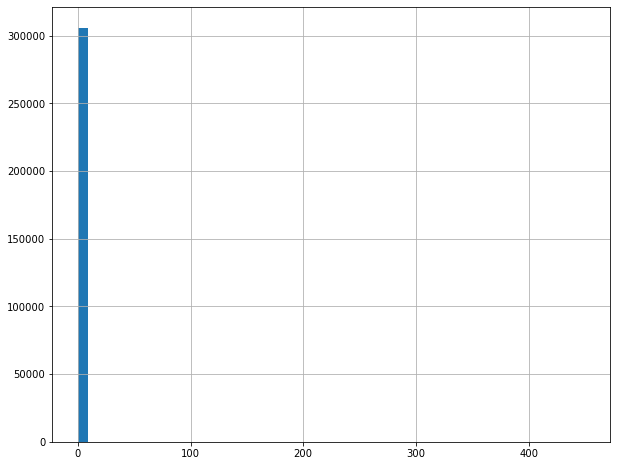

In [19]:
bInv.apr_mil.hist(bins=50)
# plt.xlim(0, 1e6)

(0.0, 10000000.0)

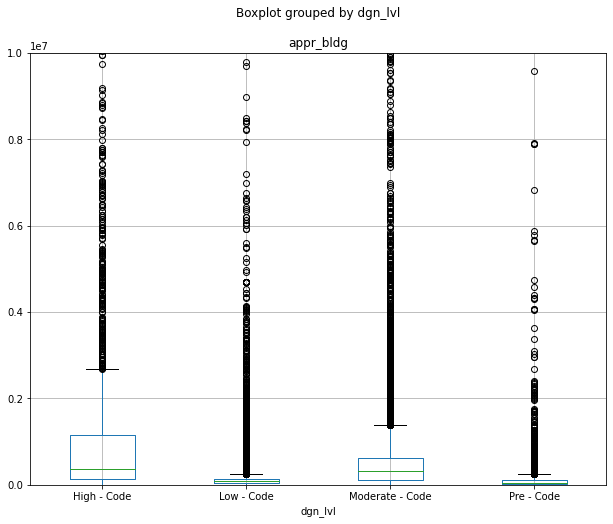

In [12]:
bInv.boxplot(column="appr_bldg", by="dgn_lvl")
plt.ylim(0, 1e7)

In [1]:
bInv.boxplot(column="appr_bldg", by="dgn_lvl")
plt.ylim(0, 1e7)

NameError: name 'bInv' is not defined

### Building Age

In [52]:
bInv["bldg_age"] = 2021 - bInv.year_built

<AxesSubplot:>

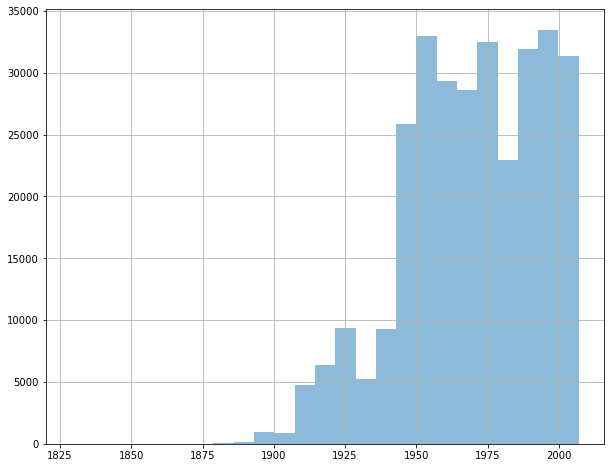

In [23]:
bInv.year_built.hist(bins=25, alpha = 0.5)

### Race and Ethnicity

In [74]:
hua['Race Ethnicity'] = "0 Vacant HU No Race Ethnicity Data"
hua['Race Ethnicity'].notes = "Identify Race and Ethnicity Housing Unit Characteristics."

hua.loc[(hua['race'] == 1) & (hua['hispan'] == 0),'Race Ethnicity'] = "1 White alone, Not Hispanic"
hua.loc[(hua['race'] == 2) & (hua['hispan'] == 0),'Race Ethnicity'] = "2 Black alone, Not Hispanic"
hua.loc[(hua['race'].isin([3,4,5,6,7])) & (hua['hispan'] == 0),'Race Ethnicity'] = "3 Other Race, Not Hispanic"
hua.loc[(hua['hispan'] == 1),'Race Ethnicity'] = "4 Any Race, Hispanic"
hua.loc[(hua['gqtype'] >= 1),'Race Ethnicity'] = "5 Group Quarters no Race Ethnicity Data"

In [81]:
hua_re  = hua[["Race Ethnicity", "huestimate"]]
hua_re.dropna(inplace=True)

/home/rafia37/anaconda3/envs/pyincoreEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
hua_re

,Race Ethnicity,huestimate
0,"2 Black alone, Not Hispanic",2.0
1,"2 Black alone, Not Hispanic",2.0
2,"2 Black alone, Not Hispanic",4.0
3,"2 Black alone, Not Hispanic",4.0
4,"2 Black alone, Not Hispanic",1.0
...,...,...
557395,0 Vacant HU No Race Ethnicity Data,0.0
557396,0 Vacant HU No Race Ethnicity Data,0.0
557397,0 Vacant HU No Race Ethnicity Data,0.0
557398,0 Vacant HU No Race Ethnicity Data,0.0


<AxesSubplot:ylabel='huestimate'>

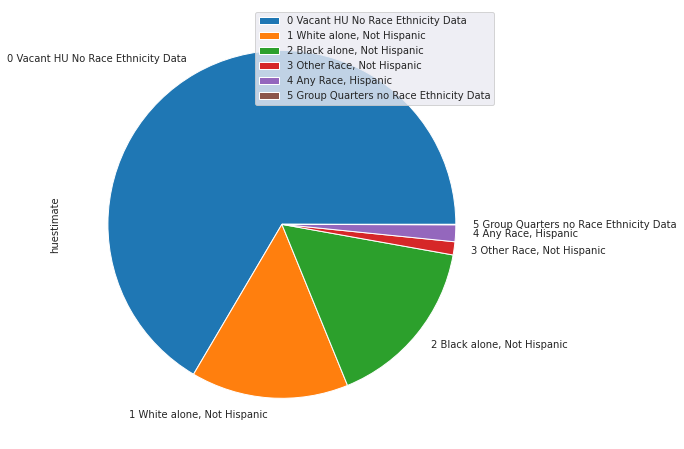

In [83]:
hua.groupby(['Race Ethnicity']).sum().plot(kind='pie', y='huestimate')